In [1]:
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [30]:
pwd = os.getcwd()
data_wd = pwd+"/Dataset_Question1/"
batch_size = 10 
total_people = 15
total_images = batch_size*total_people
F = np.zeros((d1, d2, total_images))
for batch in range(total_people):
    os.chdir(data_wd+str(batch+1))
    names = sorted(glob.glob("*.pgm"))
    names = sorted(names,key=lambda x: int(os.path.splitext(x)[0]))
    d1, d2 = plt.imread(names[0]).shape
    num = len(names)
    for n, i in enumerate(names):
        F[:, :, batch*batch_size+n] = cv2.resize((cv2.imread(i,0).astype(np.double)) / 255., (d1, d2))
    os.chdir(pwd)
F = F.reshape(d1 * d2, batch_size * total_people)
clip = 10
print(F.shape)
print(d1)
print(d2)
os.chdir(pwd)


(4096, 150)
64
64


In [59]:
F_average = np.zeros(d1*d2)
F_average = np.mean(F,axis=1)
A = np.zeros((d1*d2,total_images))
for i in range(total_images):
    A[:,i] = F[:,i] -F_average[:] 

In [60]:
u, s, vh = np.linalg.svd(A, full_matrices=True)

In [62]:
U_selected = u

In [9]:
def show_fig(image):
    plt.imshow(np.reshape(image,(d1,d2)))

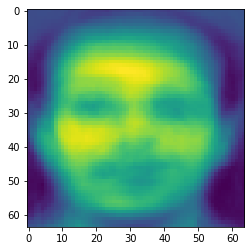

In [69]:
# Having a look at the average face
show_fig(F_average)

In [71]:
U_selected = np.transpose(u)

In [83]:
err_arr = []
RepresentativeImages = np.zeros((d1*d2,total_people))
for people in range(total_people):
    err_arr = []
    for batch in range(batch_size):
        error = np.linalg.norm(np.dot(U_selected,F[:,batch+people*batch_size]-F_average))
        err_arr.append(error)
    min_error_indx = err_arr.index(min(err_arr))
    RepresentativeImages[:,people] = F[:,min_error_indx + people*batch_size]-F_average

In [97]:
X = np.dot(U_selected,RepresentativeImages)
X.shape

(4096, 15)

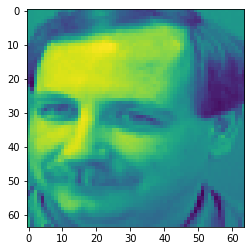

In [107]:
test_image = cv2.resize((cv2.imread("test.pgm",0).astype(np.double)) / 255., (d1, d2))
show_fig(test_image)
test_image = np.reshape(test_image,(d1*d2))

In [115]:
test_x = np.dot(U_selected,test_image-F_average)
err_arr = []
for people in range(total_people):
    error = np.linalg.norm(test_x-X[:,people])
    err_arr.append(error)
Identity = err_arr.index(min(err_arr)) + 1